In [11]:
#Notebook used to plot measurements from the SkySim5000+IA mocks vs theory predictions
%pylab inline
import pylab as plt
import numpy as np
import treecorr
#import matplotlib as plt
path_treecorr='correlations/'
path_nicaea='predictions_nicaea/'
from astropy.io import fits

Populating the interactive namespace from numpy and matplotlib


/global/common/software/lsst/common/miniconda/dev-v1/envs/desc/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


Working on bins 1 1


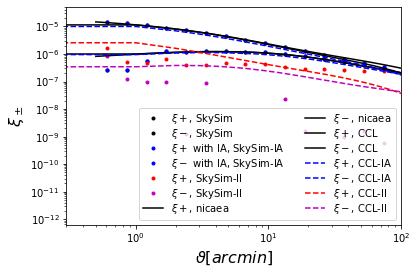

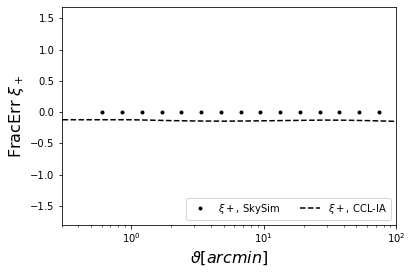

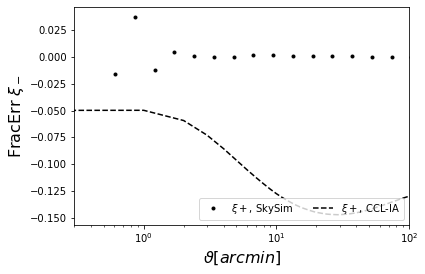

In [14]:
# Load the CCL predictions:
hdul = fits.open('theo_prediction.fits')
data=hdul[1].data
NO_IA_plus=data['NO IA+'] # Xi + (no ia)
NO_IA_minus=data['NO IA-'] # Xi - (no ia)
GI_plus=data['GI+']        #GI + (TATT) 
GI_minus=data['GI-']       #GI - (TATT)
GI_NLA_plus=data['GI_NLA+']  #GI + (NLA),
GI_NLA_minus=data['GI_NLA-']  #GI - (NLA)
II_plus=data['II+']           #II + (TATT) 
II_minus=data['II-']         #II -   (TATT)
II_NLA_plus=data['II_NLA+']  #II +   (NLA)
II_NLA_minus=data['II_NLA-']     #II -  (NLA)
theta=data['theta']            # Angular separation(s) in arcmin
z_combination=data['bin_comb']  #redshift bin combination 

# Load the Treecorr measurements:
counter=0
xip=np.empty([20,15])
xim=np.empty([20,15])
xip_IA=np.empty([20,15])
xim_IA=np.empty([20,15])
xip_pureIA=np.empty([20,15])
xim_pureIA=np.empty([20,15])



#for bin1 in np.arange(5)+1:
for bin1 in np.arange(1)+1:
    for bin2 in range (bin1,bin1+1):
    #for bin2 in range (bin1,6):

        
        print('Working on bins', bin1, bin2)
        
        # Get Treecorr measurements
        filename=path_treecorr+'cross_correlation_tomo{}_{}'.format(bin1,bin2)
        #filename_IA=path_treecorr+'infused_cross_correlation_no_noise_tomo{}_{}'.format(bin1,bin2) 
        filename_IA=path_treecorr+'infused_cross_correlation_no_noise_e1IAflip_tomo{}_{}'.format(bin1,bin2) 
        #filename_pureIA=path_treecorr+'infused_cross_correlation_TATT_tomo{}_{}'.format(bin1,bin2) 
        filename_pureIA=path_treecorr+'infused_cross_correlation_TATT_e1IAflip_tomo{}_{}'.format(bin1,bin2) 



        gg = treecorr.GGCorrelation(nbins = 20, min_sep=0.5, max_sep=475.5, sep_units='arcmin',bin_slop=0.01)
        
        #No IA
        gg.read(filename)
        xip[:,counter]=gg.xip
        xim[:,counter]=gg.xim

        # With IA, uncomment when ready
        gg.read(filename_IA)
        xip_IA[:,counter]=gg.xip
        xim_IA[:,counter]=gg.xim

        # pure IA, uncomment when ready
        gg.read(filename_pureIA)
        xip_pureIA[:,counter]=gg.xip
        xim_pureIA[:,counter]=gg.xim


        
        theta=gg.meanr     
        
        #Get xi+ theory (nicaea)
        file_nicaea=np.loadtxt(path_nicaea+'xip_StageIV_bin{}_bin{}.dat'.format(bin1,bin2))
        theta_nicaea=file_nicaea[:,0]
        xip_nicaea=file_nicaea[:,2]

        #Get xi- theory (nicaea)
        file_nicaea=np.loadtxt(path_nicaea+'xim_StageIV_bin{}_bin{}.dat'.format(bin1,bin2))
        xim_nicaea=file_nicaea[:,2]

        #Get theory (CCL)
        # Find the right column:
        for tomo in range(0,15):
            if(z_combination[tomo][0]==bin2 and z_combination[tomo][1]==bin1 ):
                #print(z_combination[tomo][0], z_combination[tomo][1])
                #print("Will use column",tomo)
                break
                
        theta_CCL=data['theta']
        theta_CCL=theta_CCL[0,:]
        xip_CCL=NO_IA_plus[tomo,:]
        xim_CCL=NO_IA_minus[tomo,:]

        xip_CCL_IA=NO_IA_plus[tomo,:] +GI_NLA_plus[tomo,:] +II_NLA_plus[tomo,:]
        xim_CCL_IA=NO_IA_minus[tomo,:]+GI_NLA_minus[tomo,:]+II_NLA_minus[tomo,:]

        xip_CCL_II=II_NLA_plus[tomo,:]
        xim_CCL_II=II_NLA_minus[tomo,:]


        
        # no IA
        plt.plot(theta, xip[:,counter], 'k.', label='$\\xi+$, SkySim')
        plt.plot(theta, xim[:,counter], 'k.', label='$\\xi-$, SkySim')

        # with IA
        plt.plot(theta, xip_IA[:,counter], 'b.', label='$\\xi+$ with IA, SkySim-IA')
        plt.plot(theta, xim_IA[:,counter], 'b.', label='$\\xi-$ with IA, SkySim-IA')

        # pure IA
        plt.plot(theta, xip_pureIA[:,counter]*1000, 'r.', label='$\\xi+$, SkySim-II')
        plt.plot(theta, xim_pureIA[:,counter]*1000, 'm.', label='$\\xi-$, SkySim-II')




        plt.plot(theta_nicaea, xip_nicaea, 'k-', label='$\\xi+$, nicaea')
        plt.plot(theta_nicaea, xim_nicaea, 'k-', label='$\\xi-$, nicaea')
        plt.plot(theta_CCL, xip_CCL, 'k-', label='$\\xi+$, CCL')
        plt.plot(theta_CCL, xim_CCL, 'k-', label='$\\xi-$, CCL')
        plt.plot(theta_CCL, xip_CCL_IA, 'b--', label='$\\xi+$, CCL-IA')
        plt.plot(theta_CCL, xim_CCL_IA, 'b--', label='$\\xi-$, CCL-IA')

        plt.plot(theta_CCL, xip_CCL_II, 'r--', label='$\\xi+$, CCL-II')
        plt.plot(theta_CCL, xim_CCL_II, 'm--', label='$\\xi-$, CCL-II')

        

        plt.loglog()
        plt.xlabel('$\\vartheta [arcmin]$', fontsize=16)
        plt.ylabel('$\\xi_\\pm$', fontsize=16)
        plt.legend(loc='lower right', ncol=2, labelspacing=0.1)
        plt.xlim([0.3, 100])
        plt.show()
        
        #-------------
        # Plot ratios:
        plt.plot(theta, xip_IA[:,counter]/xip[:,counter]-1, 'k.', label='$\\xi+$, SkySim')
        plt.plot(theta_CCL, xip_CCL_IA/xip_CCL -1 , 'k--', label='$\\xi+$, CCL-IA')
        plt.semilogx()
        plt.xlabel('$\\vartheta [arcmin]$', fontsize=16)
        plt.ylabel('FracErr $\\xi_+$', fontsize=16)
        plt.legend(loc='lower right', ncol=2, labelspacing=0.1)
        plt.xlim([0.3, 100])
        plt.show()
         
        
        plt.plot(theta, xim_IA[:,counter]/xim[:,counter]-1, 'k.', label='$\\xi+$, SkySim')
        plt.plot(theta_CCL, xim_CCL_IA/xim_CCL -1 , 'k--', label='$\\xi+$, CCL-IA')
        plt.semilogx()
        plt.xlabel('$\\vartheta [arcmin]$', fontsize=16)
        plt.ylabel('FracErr $\\xi_-$', fontsize=16)
        plt.legend(loc='lower right', ncol=2, labelspacing=0.1)
        plt.xlim([0.3, 100])
        plt.show()
         

       
        
        
        counter +=1



In [6]:
gg.xip


array([4.1211e-12, 4.0463e-12, 4.0507e-12, 4.1406e-12, 3.8637e-12,
       3.7145e-12, 3.6951e-12, 3.5869e-12, 3.5201e-12, 3.4795e-12,
       3.4479e-12, 3.4360e-12, 3.4183e-12, 3.4113e-12, 3.4053e-12,
       3.3993e-12, 3.3932e-12, 3.3804e-12, 3.3603e-12, 3.3285e-12])

In [ ]:
xip[:,14]